In [81]:
import anndata as ad
import scanpy as sc
import numpy as np
import seaborn as sns
import palettable
import scipy
import pandas as pd
import scipy.io as sio
import pickle
import sys
import matplotlib
sys.path.append('/home/yzy/bioSIMS/code/analysis')
from utils_220 import *
sc.set_figure_params(dpi=500, color_map='viridis',dpi_save=500,transparent=True)
sc.settings.verbosity = 2
%matplotlib inline
heatmap_cmp = palettable.cmocean.diverging.Balance_20.mpl_colormap
matplotlib.rcParams['figure.figsize'] = (4,4)


In [2]:
def get_adj_matters(key_matters,matter_list):
    key_matters = np.array(key_matters).astype('float')
    matter_list = np.array(matter_list).astype('float')
    adjested_key_matters = []
    for k in key_matters:
        m_diff = np.abs(matter_list-k)
        min_diff_idx = np.argmin(m_diff)
        min_diff_m = matter_list[min_diff_idx]
        adjested_key_matters.append(min_diff_m)
    adjested_key_matters = np.array(adjested_key_matters)
    return adjested_key_matters

In [3]:
ad_file_list = ['fig4_rep0_cls6_fluo.h5ad','fig4_rep1_cls6_fluo.h5ad','fig4_rep2_cls6_fluo.h5ad',
               'fig4_rep3_cls6_fluo.h5ad']

In [44]:
a_rep_list = []
for cur_ad_file in ad_file_list:
    a = ad.read_h5ad('/home/yzy/ipynbs/figures/Fig4_dump_data/'+cur_ad_file)
    a_rep_list.append(a)


In [139]:
-np.log10(0.05)

1.3010299956639813

In [132]:

# R1:902
# R2:716
# R3:546
# R4:682

AnnData object with n_obs × n_vars = 716 × 231 
    obs: 'cls_5', 'cls_5_pca', 'cls_8_pca', 'cls_4', 'leiden', 'cls_5_reorder', 'fibro_dist', 'fibro_dist_mum', 'test'
    uns: 'cls_4_colors', 'cls_5_colors', 'cls_5_pca_colors', 'cls_5_reorder_colors', 'cls_8_pca_colors', 'leiden', 'leiden_colors', 'neighbors', 'rep_list', 'test_colors', 'umap'
    obsm: 'X_umap', 'cls_4_rep', 'cls_5_pca_rep', 'cls_5_rep', 'cls_8_pca_rep', 'spatial'

In [136]:
a_rep_list[2]

AnnData object with n_obs × n_vars = 682 × 228 
    obs: 'cls_5', 'cls_6', 'cls_5_reorder', 'fibro_dist', 'fibro_dist_mum', 'test'
    uns: 'cls_5_colors', 'cls_5_reorder_colors', 'cls_6_colors', 'rep_list', 'test_colors'
    obsm: 'X_umap', 'cls_5_rep', 'cls_6_rep', 'spatial'

In [45]:
reference_m_list = a_rep_list[3].var_names
a_rep_list_adj = []
for a in a_rep_list:
    m_common = get_adj_matters(a.var_names,reference_m_list).astype('str')
    cur_m = get_adj_matters(m_common,a.var_names).astype('str')
    a_adj = a[:,cur_m]
    a_adj.var_names = m_common
    a_adj.var_names_make_unique()
    a_rep_list_adj.append(a_adj)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [50]:
a_concat = a_rep_list_adj[0].concatenate([a_rep_list_adj[1],a_rep_list_adj[2],a_rep_list_adj[3]])

In [119]:
# Rep1
R1_F = [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 12, 16, 17, 18, 19, 20, 23, 24, 25, 26, 29, 30, 31, 32, 35, 37, 38, 39, 40, 41, 42, 43, 44, 49, 51, 52, 54, 55, 59, 60, 61, 64, 65, 66, 67, 71, 73, 74, 76, 77, 78, 79, 80, 82, 83, 84, 88, 89, 90, 91, 92, 95, 96, 99, 100, 101, 102, 106, 107, 108, 110, 111, 112, 113, 118, 119, 121, 122, 126, 127, 130, 131, 132, 133, 136, 137, 141, 142, 147, 148, 150, 151, 153, 155, 156, 157, 158, 159, 160, 163, 164, 171, 172, 173, 174, 176, 177, 178, 179, 185, 186, 187, 188, 189, 191, 192, 194, 197, 198, 199, 203, 204, 206, 207, 208, 210, 211, 216, 217, 218, 219, 220, 221, 226, 227, 228, 229, 233, 236, 237, 241, 242, 243, 244, 247, 248, 249, 252, 253, 254, 255, 258, 259, 263, 264, 265, 267, 271, 276, 277, 278, 281, 282, 285, 286, 289, 290, 293, 294, 295, 300, 301, 302, 303, 307, 308, 309, 312, 315, 318, 323, 324, 325, 330, 331, 332, 333, 334, 335, 336, 340, 344, 345, 346, 347, 348, 355, 356, 357, 360, 363, 368, 369, 370, 373, 374, 375, 379, 380, 385, 387, 388, 389, 395, 397, 398, 402, 403, 406, 407, 412, 413, 414, 415, 424, 425, 426, 432, 433, 434, 438, 439, 441, 444, 445, 450, 451, 454, 455, 460, 461, 462, 470, 471, 475, 476, 489, 490, 493, 494, 500, 501, 503, 504, 511, 514, 525, 526, 531, 532, 533, 534, 539, 545, 550, 551, 556, 572, 573, 574, 580, 581, 589, 590, 591, 593, 599, 604, 606, 607, 611, 614, 617, 618, 622, 623, 631, 632, 636, 641, 642, 647, 648, 656, 666, 667, 668, 673, 677, 682, 688, 690, 705, 706, 707, 710, 721, 724, 730, 731, 732, 743, 745, 763, 764, 775, 778, 791, 793, 815, 836, 851]
R1_N = [152,149,165,167,209,195,200,213,222,283,260,245,261,283,296,304,299,272,326,364,386,343,351,371,381,376,390,399,409,408,421,427,446,428,486,477]
R1_D = [609,628,652,603,639,640,661,684,679,687,714,703,695,686,718,719,733,735,753,747,734,766,769,783,794,804,808,823,773,759,823]

# Rep0
R2_N = [188,213,214,227,239,237,240,251,260,269,281,294,265,254,244,230,253,259,272,273,286,280,293,294,302,307,323,330,331,359,353,380,376,374,366,387,385,392,397,402,409,419,431,432,424,420,407,421,445,448,439,455,469,471,480,483,479,486,487,491,508,509,516,503,510,517,545,558,557,572,582,591,598,597,590,612,605,616,629,621,628,643,638,634,649,654,657,652,676,675,667,661,680,682,689,701]
R2_D = [201,221,235,255,243,209,215,266,282,283,284,264,258,298,310,308,321,334,322,335,339,349,355,351,361,372,369,395,400]

# Rep3
R3_N = [224,225,239,246,255,258,266,265,274,267,282,285,291,302,300,284,276,273,279,278,270,298,299,303,320,313,321,324,314,315,309,340,332,339,336,335,331,328,334,346,347,344,351,348,356,360,345,352,358,363,371,374,368,379,376,375,378,395,400,403,393,396,389,390,382,409,408,420,411,415,418,414,419,436,446,445,456]
R3_D = [330,353,355,361,357,362,364,369,380,381,384,399,397,401,398,417,416,421,423,434,432,450,451,454,444,440,476,468,463,486]

# Rep2
R4_N = [57,76,77,88,83,74,104,106,108,109,103,113,101,102,110,94,140,131,132,127,128,145,144,149,154,165,172,177,184,195,186,194,191,213,208,202,203,218,219,214,234,220,224,239,238,247,259,248,252,233,243,265,269,280,277,270,275,312,310,317,298,308,320,329,355,361,357,350,337,372]
R4_D = [483,498,499,519,508,527,532,528,545,550,531,544,558,563,559,563,577,589,478,537,602]

R1_F = list(set(R1_F))
R1_N = list(set(R1_N))
R1_D = list(set(R1_D))

R2_N = list(set(R2_N))
R2_D = list(set(R2_D))

R3_N = list(set(R3_N))
R3_D = list(set(R3_D))

R4_N = list(set(R4_N))
R4_D = list(set(R4_D))





In [120]:
pd_dict = {
}
pd_dict['m/z'] = a_concat.var_names
pd_dict['R1_F'] = np.array(np.sum(a_concat[a_concat.obs['batch']=='1'][R1_F].X,axis=0))
pd_dict['R1_N'] = np.array(np.sum(a_concat[a_concat.obs['batch']=='1'][R1_N].X,axis=0))
pd_dict['R1_D'] = np.array(np.sum(a_concat[a_concat.obs['batch']=='1'][R1_D].X,axis=0))

pd_dict['R2_N'] = np.array(np.sum(a_concat[a_concat.obs['batch']=='0'][R2_N].X,axis=0))
pd_dict['R2_D'] = np.array(np.sum(a_concat[a_concat.obs['batch']=='0'][R2_D].X,axis=0))

pd_dict['R3_N'] = np.array(np.sum(a_concat[a_concat.obs['batch']=='3'][R3_N].X,axis=0))
pd_dict['R3_D'] = np.array(np.sum(a_concat[a_concat.obs['batch']=='3'][R3_D].X,axis=0))

pd_dict['R4_N'] = np.array(np.sum(a_concat[a_concat.obs['batch']=='2'][R4_N].X,axis=0))
pd_dict['R4_D'] = np.array(np.sum(a_concat[a_concat.obs['batch']=='2'][R4_D].X,axis=0))



In [121]:
pd_df = pd.DataFrame(pd_dict)
pd_df.to_csv('Fig4_metabolism_bulk.csv')

In [122]:
a_bulk_X = np.vstack([pd_dict['R1_F'],pd_dict['R1_N'],pd_dict['R1_D'],
                     pd_dict['R2_N'],pd_dict['R2_D'],
                     pd_dict['R3_N'],pd_dict['R3_D'],
                     pd_dict['R4_N'],pd_dict['R4_D']])

(9, 215)

In [123]:


in_X = a_bulk_X
# g = map(str,range(in_X.shape[1]))
g = map(str,a_concat.var_names)
Genes = []
None_idx = 0
Genes = g
# obs_name must be str
obs_name = list(map(str,range(in_X.shape[0])))
obs = pd.DataFrame(index=obs_name)

# var_name must be str
var = pd.DataFrame(index=Genes)

#     var['Genes'] = Genes
a_bulk = ad.AnnData(in_X,  obs=obs,var=var, dtype='float32')



In [124]:
label_list = ['R1_F','R1_N','R1_D',
             'R2_N','R2_D',
             'R3_N','R3_D',
             'R4_N','R4_D',]
type_list = ['F','N','D',
            'N','D',
            'N','D',
            'N','D']
region_list = ['R1','R1','R1',
              'R2','R2',
              'R3','R3',
              'R4','R4',]
a_bulk.obs['label'] = label_list
a_bulk.obs['label'] = a_bulk.obs['label'].astype('category')

a_bulk.obs['type'] = type_list
a_bulk.obs['type'] = a_bulk.obs['type'].astype('category')

a_bulk.obs['region'] = region_list
a_bulk.obs['region'] = a_bulk.obs['region'].astype('category')

In [125]:
a_bulk_tmp = a_bulk.copy()

In [110]:
a_bulk = a_bulk_tmp.copy()

In [126]:
sc.pp.recipe_zheng17(a_bulk,n_top_genes=100)

running recipe zheng17
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
    finished (0:00:00)


In [98]:
sc.pp.normalize_per_cell(a_bulk)

normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


In [107]:
a_bulk

AnnData object with n_obs × n_vars = 9 × 0 
    obs: 'label', 'type', 'region', 'n_counts', 'n_genes'
    var: 'n_cells'
    uns: 'pca', 'type_colors', 'label_colors', 'region_colors', 'log1p'
    obsm: 'X_pca'
    varm: 'PCs'

In [127]:
sc.tl.pca(a_bulk,n_comps=8)

computing PCA with n_comps = 8
    finished (0:00:00)


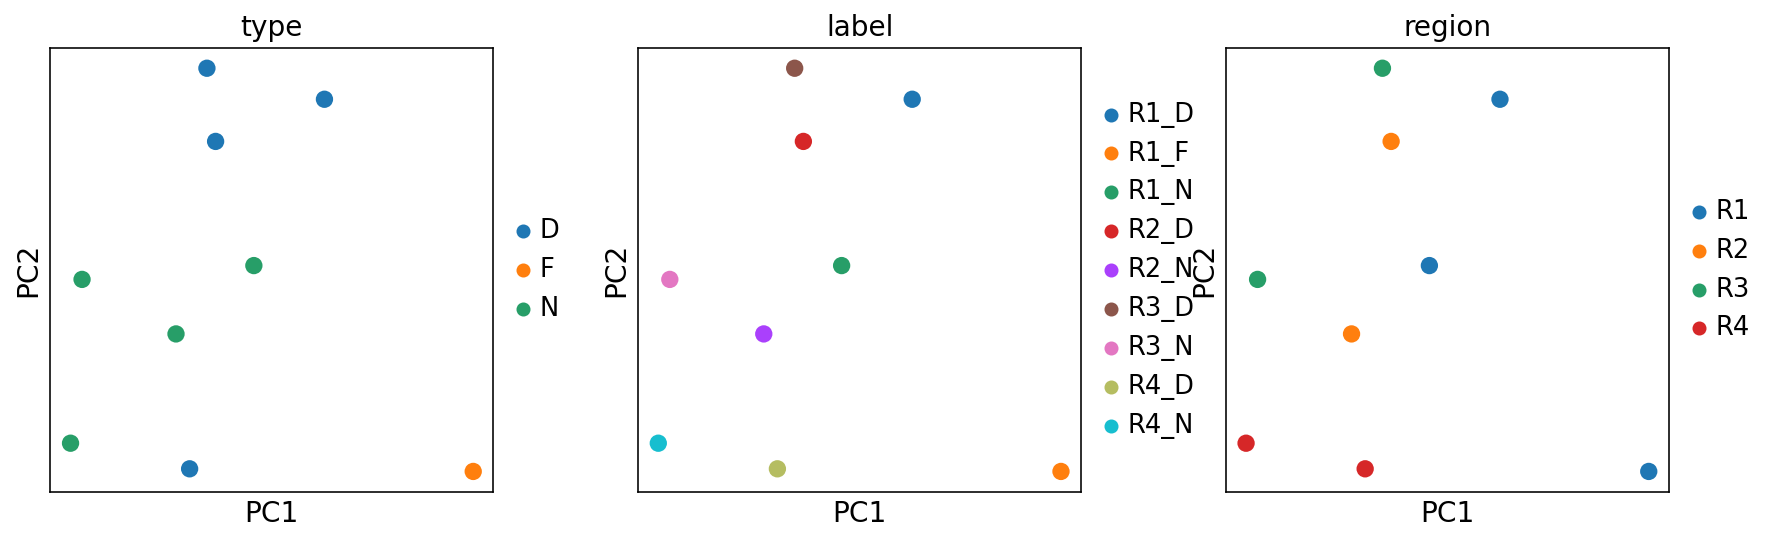

In [128]:
sc.pl.pca(a_bulk,color=['type','label','region'],s=300)

In [129]:
a_bulk_wo_F = a_bulk[a_bulk.obs['type']!='F'].copy()

In [130]:
sc.tl.rank_genes_groups(a_bulk_wo_F,groupby='type')

ranking genes
    finished (0:00:00)


/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:252: RuntimeWarning: invalid value encountered in log2
  rankings_gene_logfoldchanges.append(np.log2(foldchanges[global_indices]))


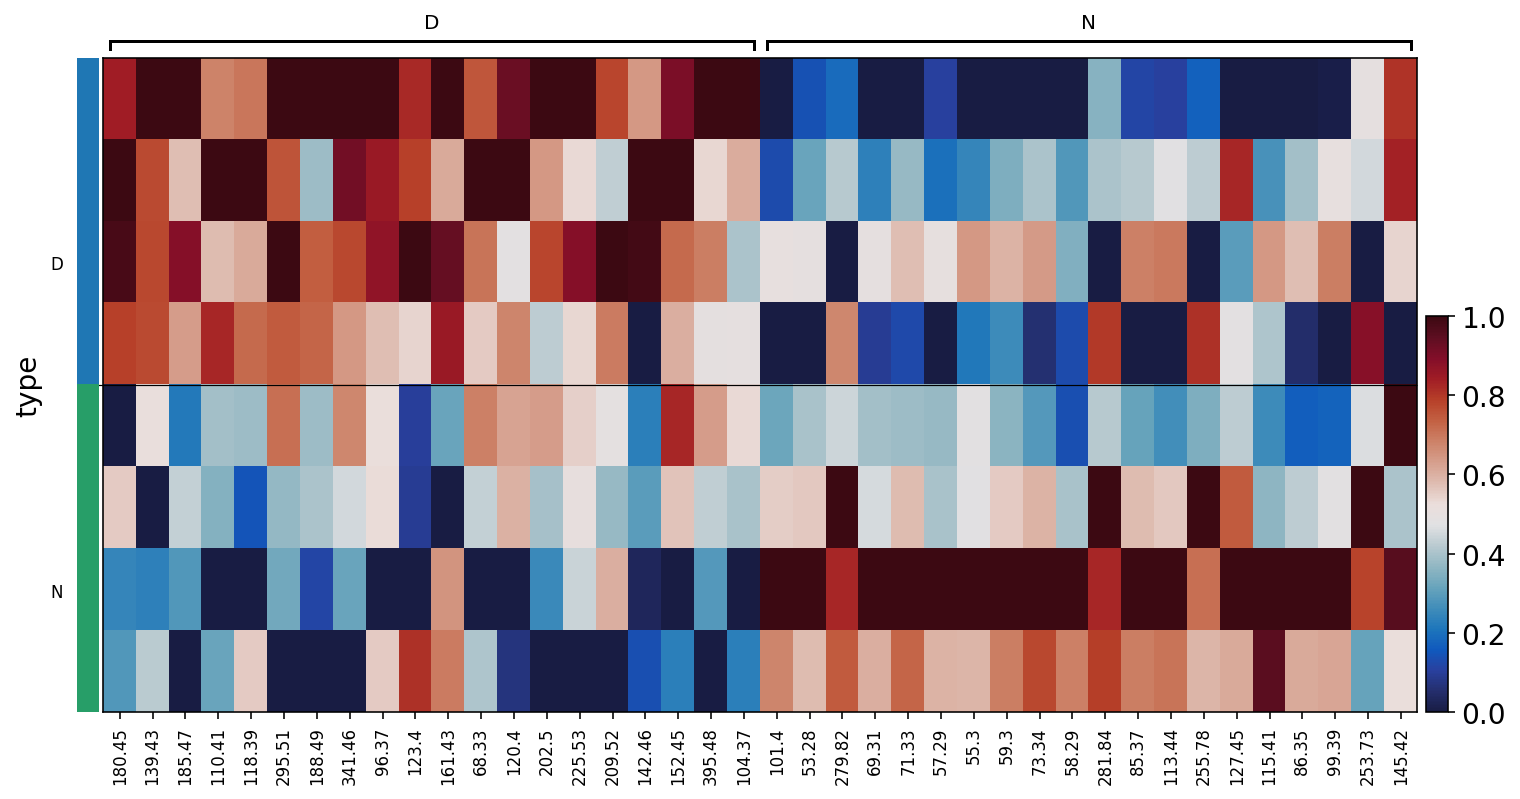

In [131]:
heatmap_cmp = palettable.cmocean.diverging.Balance_20.mpl_colormap
sc.pl.rank_genes_groups_heatmap(a_bulk_wo_F,n_genes=20,groupby='type',standard_scale='var', cmap=heatmap_cmp,dendrogram=False,save=None)


In [ ]:
sc.pl.heatmap(a_bulk_wo_F)

In [35]:
a_list[0].uns['test_colors'] = [tuple(t) for t in tmp]

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

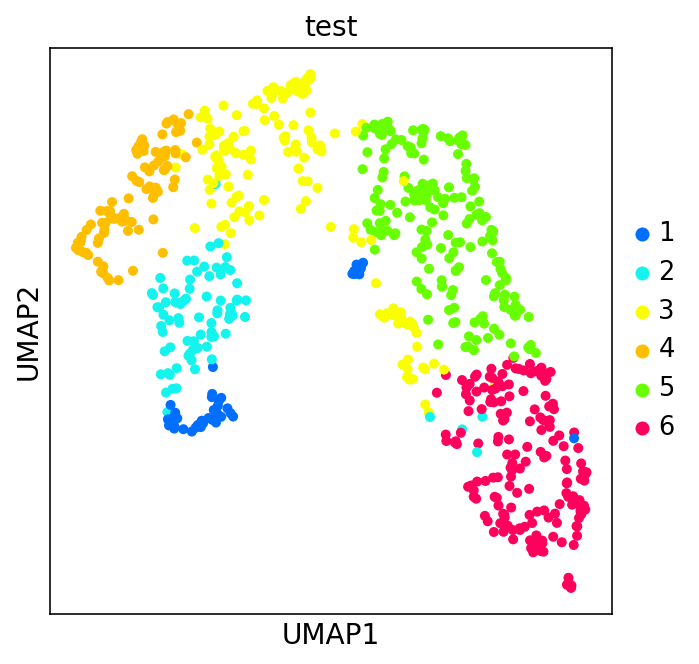

In [36]:
fig,ax = plt.subplots(1,1,figsize=(5,5))
sc.pl.umap(a_list[0],color=['test'],ax=ax,save=None,s=100)